In [77]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [78]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataset = tf.keras.preprocessing.image_dataset_from_directory(
        
# )
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 18962 images belonging to 14 classes.


In [65]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [81]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [82]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18962 images belonging to 14 classes.


In [83]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18962 images belonging to 14 classes.


In [21]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6006989  0.5340322  0.55756164]
  [0.59321743 0.52655077 0.5500802 ]
  [0.58573586 0.5190692  0.5425986 ]
  ...
  [0.7441415  0.6970827  0.712769  ]
  [0.74958223 0.7025234  0.7182097 ]
  [0.6669504  0.6198916  0.63557786]]

 [[0.51392925 0.4472626  0.47079203]
  [0.5263025  0.45963582 0.48316523]
  [0.5386757  0.4720091  0.4955385 ]
  ...
  [0.7467313  0.6996724  0.7153587 ]
  [0.74497825 0.6979194  0.7136057 ]
  [0.65745467 0.61039585 0.6260821 ]]

 [[0.4981138  0.43144712 0.45497656]
  [0.49437305 0.4277064  0.4512358 ]
  [0.49063233 0.42396566 0.44749507]
  ...
  [0.749321   0.70226216 0.71794844]
  [0.74037427 0.69331545 0.7090017 ]
  [0.6479589  0.60090005 0.6165863 ]]

 ...

 [[0.67604303 0.62506264 0.66035676]
  [0.68432504 0.6333446  0.66863877]
  [0.56584376 0.5148634  0.5501575 ]
  ...
  [0.8767225  0.8571147  0.8806441 ]
  [0.8801755  0.8605676  0.88409704]
  [0.8836284  0.8640206  0.88755   ]]

 [[0.6809347  0.62995434 0.66524845]
  [0.6814475  0.6304671  0.66576123]


## Building the Model

In [84]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 14

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [85]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [86]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 247s 5s/step - loss: 2.5382 - accuracy: 0.1576 - val_loss: 2.4096 - val_accuracy: 0.1615
Epoch 2/20
47/47 [==============================] - 244s 5s/step - loss: 2.3415 - accuracy: 0.1988 - val_loss: 2.1919 - val_accuracy: 0.3021
Epoch 3/20
47/47 [==============================] - 240s 5s/step - loss: 2.2117 - accuracy: 0.2686 - val_loss: 2.1121 - val_accuracy: 0.2969
Epoch 4/20
47/47 [==============================] - 245s 5s/step - loss: 2.0799 - accuracy: 0.3285 - val_loss: 1.7979 - val_accuracy: 0.4219
Epoch 5/20
47/47 [==============================] - 236s 5s/step - loss: 1.7596 - accuracy: 0.4282 - val_loss: 1.7308 - val_accuracy: 0.4323
Epoch 6/20
47/47 [==============================] - 216s 5s/step - loss: 1.5508 - accuracy: 0.4840 - val_loss: 1.5101 - val_accuracy: 0.5104
Epoch 7/20
47/47 [==============================] - 218s 5s/step - loss: 1.4762 - accuracy: 0.5020 - val_loss: 1.4899 - val_accuracy: 0.5365
Epoch 8/20
47

In [87]:
scores = model.evaluate(test_generator)

593/593 [==============================] - 1051s 2s/step - loss: 0.6898 - accuracy: 0.7613


# Accuracy and Loss Curves

In [88]:
history

In [89]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [90]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [91]:
type(history.history['loss'])
len(history.history['loss'])

20

In [92]:
history.history['loss'][:5]

[2.5382354259490967,
 2.3415257930755615,
 2.2116880416870117,
 2.0799171924591064,
 1.7595906257629395]

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [94]:
val_acc

[0.1614583283662796,
 0.3020833432674408,
 0.296875,
 0.421875,
 0.4322916567325592,
 0.5104166865348816,
 0.5364583134651184,
 0.578125,
 0.5364583134651184,
 0.5572916865348816,
 0.734375,
 0.6875,
 0.703125,
 0.7760416865348816,
 0.6979166865348816,
 0.78125,
 0.7447916865348816,
 0.765625,
 0.7708333134651184,
 0.7291666865348816]

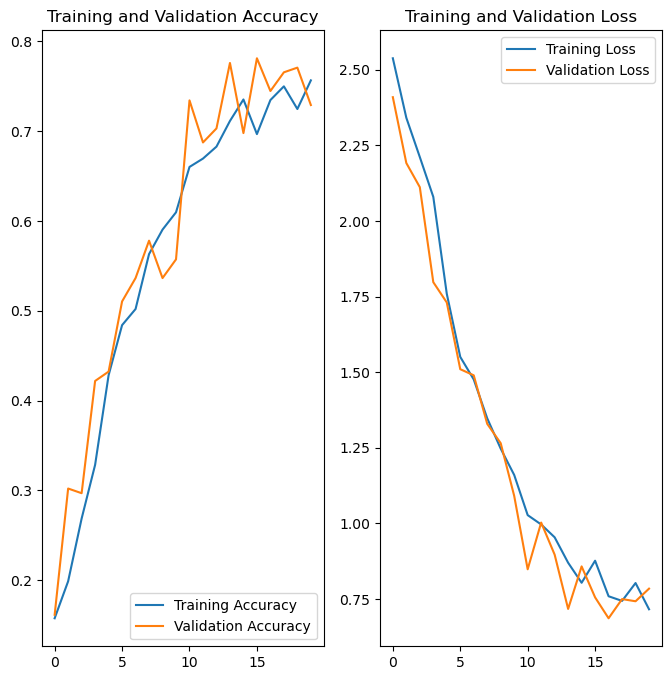

In [95]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

In [96]:
import numpy as np

First image to predict
Actual label: Tomato_Bacterial_spot
1/1 [==============================] - 1s 890ms/step
Predicted label: Tomato_Bacterial_spot


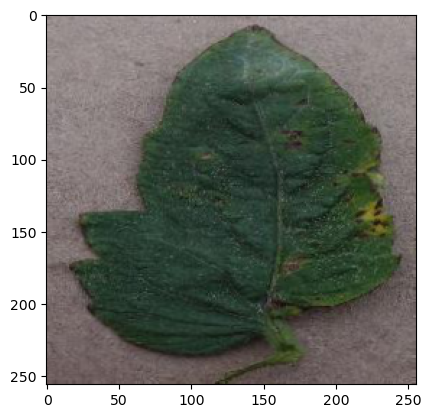

In [108]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [109]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 103ms/step


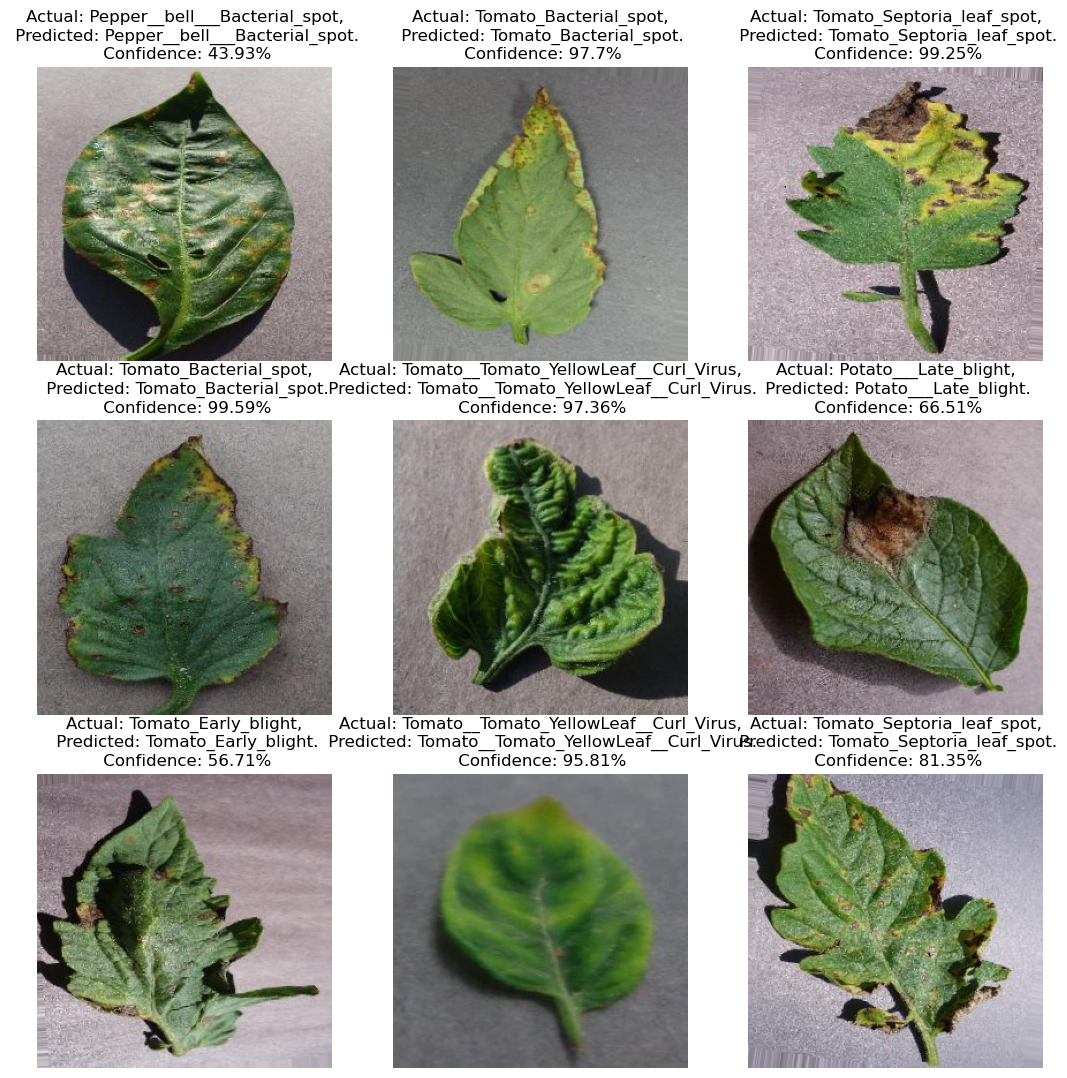

In [113]:
plt.figure(figsize=(13, 13))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# Saving the Model

In [114]:
model_version=1

In [115]:
model.save(f"../models/version_{model_version}.h5")